In [ ]:
# Part-A(30 Marks)

In [ ]:
import numpy as np
from scipy.stats import norm
import time
start_time = time.time()
import pandas as pd
import numpy as np
import random
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix #Classification report
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from imblearn.over_sampling import RandomOverSampler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score




In [ ]:
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


Part 1. 1 a - Read all the 3 CSV files as DataFrame and store them into 3 separate variables.

In [ ]:
path="/content/drive/MyDrive/AIMLCOURSE/SupervisedLearning/Normal.csv"
Normal=pd.read_csv(path)

In [ ]:
path="/content/drive/MyDrive/AIMLCOURSE/SupervisedLearning/Normal.csv"
Normal=pd.read_csv(path)

In [ ]:
path="/content/drive/MyDrive/AIMLCOURSE/SupervisedLearning/Type_H.csv"
Type_H=pd.read_csv(path)

In [ ]:
path="/content/drive/MyDrive/AIMLCOURSE/SupervisedLearning/Type_S.csv"
Type_S=pd.read_csv(path)

Part 1.1 b - Print Shape and columns of all the 3 DataFrames


In [ ]:
# Print the shape and columns of the Normal DataFrame
print("Shape of Normal DataFrame:", Normal.shape)
print("Columns of Normal DataFrame:", Normal.columns)

Shape of Normal DataFrame: (100, 7)
Columns of Normal DataFrame: Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object')


In [ ]:
# Print the shape and columns of the Type_H DataFrame
print("\nShape of Type_H DataFrame:", Type_H.shape)
print("Columns of Type_H DataFrame:", Type_H.columns)


Shape of Type_H DataFrame: (60, 7)
Columns of Type_H DataFrame: Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object')


In [ ]:
# Print the shape and columns of the Type_S DataFrame
print("\nShape of Type_S DataFrame:", Type_S.shape)
print("Columns of Type_S DataFrame:", Type_S.columns)


Shape of Type_S DataFrame: (150, 7)
Columns of Type_S DataFrame: Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object')


Part 1.1 c -Compare Column names of all the 3 DataFrames and clearly write observations.

In [ ]:
# Compare column names of all three DataFrames
normal_columns = set(Normal.columns)
type_h_columns = set(Type_H.columns)
type_s_columns = set(Type_S.columns)

# Check for common columns
common_columns = normal_columns.intersection(type_h_columns, type_s_columns)

# Check for columns unique to each DataFrame
unique_columns_normal = normal_columns.difference(type_h_columns, type_s_columns)
unique_columns_type_h = type_h_columns.difference(normal_columns, type_s_columns)
unique_columns_type_s = type_s_columns.difference(normal_columns, type_h_columns)

# Print observations
print("Common Columns:", common_columns)
print("\nColumns Unique to Normal DataFrame:", unique_columns_normal)
print("Columns Unique to Type_H DataFrame:", unique_columns_type_h)
print("Columns Unique to Type_S DataFrame:", unique_columns_type_s)


Common Columns: {'S_Degree', 'P_radius', 'P_tilt', 'L_angle', 'S_slope', 'P_incidence', 'Class'}

Columns Unique to Normal DataFrame: set()
Columns Unique to Type_H DataFrame: set()
Columns Unique to Type_S DataFrame: set()


In [ ]:
# Compare column names of all three DataFrames
columns_equal = Normal.columns.tolist() == Type_H.columns.tolist() == Type_S.columns.tolist()

# Write observations based on the result
if columns_equal:
    print("Observation: All three DataFrames have the same column names.")
    print("Column Names:", Normal.columns.tolist())  # Print the column names as they are the same.
else:
    print("Observation: Not all three DataFrames have the same column names.")
    print("Column Names in Normal DataFrame:", Normal.columns.tolist())
    print("Column Names in Type_H DataFrame:", Type_H.columns.tolist())
    print("Column Names in Type_S DataFrame:", Type_S.columns.tolist())


Observation: All three DataFrames have the same column names.
Column Names: ['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree', 'Class']


Part 1.1 d - Print DataTypes of all the 3 DataFrames.

In [ ]:
# Print data types of all three DataFrames
print("Data Types of Columns in Normal DataFrame:")
print(Normal.dtypes)

print("\nData Types of Columns in Type_H DataFrame:")
print(Type_H.dtypes)

print("\nData Types of Columns in Type_S DataFrame:")
print(Type_S.dtypes)


Data Types of Columns in Normal DataFrame:
P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object

Data Types of Columns in Type_H DataFrame:
P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object

Data Types of Columns in Type_S DataFrame:
P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object


Part 1.1 e - Observe and share variation in ‘Class’ feature of all the 3 DaraFrames


In [ ]:
# Analyze the 'Class' feature in the Normal DataFrame
print("Normal DataFrame 'Class' Feature:")
print(Normal['Class'].value_counts())

# Analyze the 'Class' feature in the Type_H DataFrame
print("\nType_H DataFrame 'Class' Feature:")
print(Type_H['Class'].value_counts())

# Analyze the 'Class' feature in the Type_S DataFrame
print("\nType_S DataFrame 'Class' Feature:")
print(Type_S['Class'].value_counts())




Normal DataFrame 'Class' Feature:
Normal    73
Nrmal     27
Name: Class, dtype: int64

Type_H DataFrame 'Class' Feature:
Type_H    37
type_h    23
Name: Class, dtype: int64

Type_S DataFrame 'Class' Feature:
Type_S    133
tp_s       17
Name: Class, dtype: int64


Part 1.2 a - Unify all the variations in ‘Class’ feature for all the 3 DataFrames


In [ ]:
# Unify the 'Class' variations in the Normal DataFrame
Normal['Class'] = Normal['Class'].str.lower()

# Unify the 'Class' variations in the Type_H DataFrame
Type_H['Class'] = Type_H['Class'].str.lower()

# Unify the 'Class' variations in the Type_S DataFrame
Type_S['Class'] = Type_S['Class'].str.lower()


In [ ]:
# Print unique values in the 'Class' feature for Normal DataFrame
print("Unique values in 'Class' for Normal DataFrame:", Normal['Class'].unique())

# Print unique values in the 'Class' feature for Type_H DataFrame
print("Unique values in 'Class' for Type_H DataFrame:", Type_H['Class'].unique())

# Print unique values in the 'Class' feature for Type_S DataFrame
print("Unique values in 'Class' for Type_S DataFrame:", Type_S['Class'].unique())


Unique values in 'Class' for Normal DataFrame: ['normal' 'nrmal']
Unique values in 'Class' for Type_H DataFrame: ['type_h']
Unique values in 'Class' for Type_S DataFrame: ['type_s' 'tp_s']


Part 1.2 b - Combine all the 3 DataFrames to form a single DataFrame


In [ ]:
# Combine the three DataFrames into one
combined_df = pd.concat([Normal, Type_H, Type_S])

# Check the shape of the combined DataFrame
print("Shape of the combined DataFrame:", combined_df.shape)

Shape of the combined DataFrame: (310, 7)


Part 1.2 c - Print 5 random samples of this DataFrame


In [1]:
# Print 5 random samples from the combined DataFrame
random_samples = combined_df.sample(n=5, random_state=2)  # You can change the random_state if desired

# Display the random samples
print("5 Random Samples from the Combined DataFrame:")
print(random_samples)


NameError: ignored

Part 1.2 d - Print Feature-wise percentage of Null values


In [ ]:
# Calculate the percentage of null values for each feature
null_percentage = (combined_df.isnull().mean() * 100).round(2) #Calculating mean on frequency,for both 0 and 1 gives same output.

# Print the feature-wise percentage of null values
print("Feature-wise Percentage of Null Values:")
print(null_percentage)


Feature-wise Percentage of Null Values:
P_incidence    0.0
P_tilt         0.0
L_angle        0.0
S_slope        0.0
P_radius       0.0
S_Degree       0.0
Class          0.0
dtype: float64


Part 1.2 e - Check 5-point summary of the new DataFrame


In [ ]:
# Calculate the 5-point summary of the new DataFrame
summary = combined_df.describe()

# Print the 5-point summary
print("5-Point Summary of the New DataFrame:")
print(summary)


5-Point Summary of the New DataFrame:
       P_incidence      P_tilt     L_angle     S_slope    P_radius    S_Degree
count   310.000000  310.000000  310.000000  310.000000  310.000000  310.000000
mean     60.496653   17.542822   51.930930   42.953831  117.920655   26.296694
std      17.236520   10.008330   18.554064   13.423102   13.317377   37.559027
min      26.147921   -6.554948   14.000000   13.366931   70.082575  -11.058179
25%      46.430294   10.667069   37.000000   33.347122  110.709196    1.603727
50%      58.691038   16.357689   49.562398   42.404912  118.268178   11.767934
75%      72.877696   22.120395   63.000000   52.695888  125.467674   41.287352
max     129.834041   49.431864  125.742385  121.429566  163.071041  418.543082


Part 1.3 a - Visualize a heatmap to understand correlation between all features


<ipython-input-22-f5d57daa10ac>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = combined_df.corr()


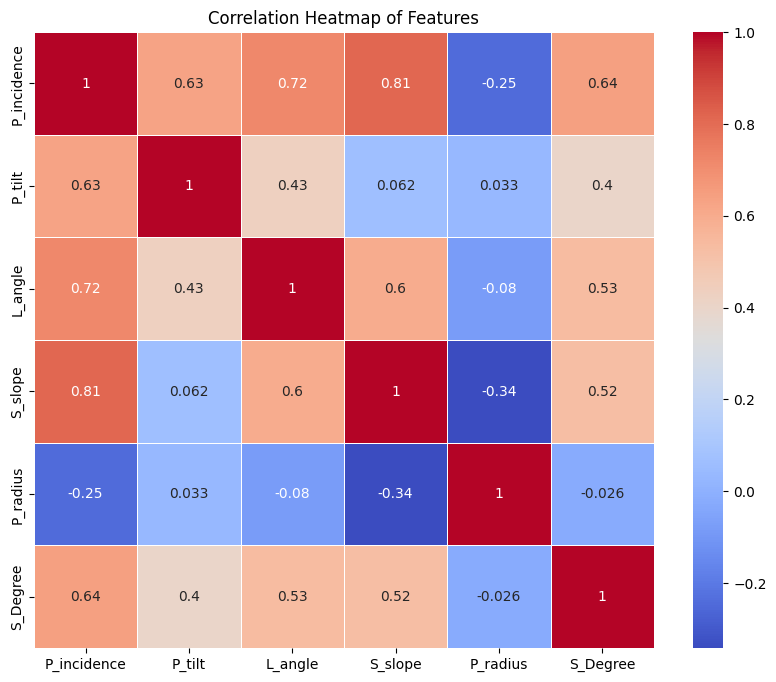

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = combined_df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Features")
plt.show()


Part 1.3 b - Share insights on correlation


In [ ]:
"""
Positive Correlation: When two features have a positive correlation, it means that as one feature increases, the other tends to increase as well.

Negative Correlation: Conversely, when two features have a negative correlation, it means that as one feature increases, the other tends to decrease.

No Correlation: Features with no or weak correlations are represented by lighter colors in the heatmap.

Multicollinearity: Multicollinearity occurs when two or more features are highly correlated with each other.

Looking at the correlation values from the heatmap generated, we can draw appropriate correlations.
"""


'\nPositive Correlation: When two features have a positive correlation, it means that as one feature increases, the other tends to increase as well.\n\nNegative Correlation: Conversely, when two features have a negative correlation, it means that as one feature increases, the other tends to decrease.\n\nNo Correlation: Features with no or weak correlations are represented by lighter colors in the heatmap.\n\nMulticollinearity: Multicollinearity occurs when two or more features are highly correlated with each other.\n\nLooking at the correlation values from the heatmap generated, we can draw appropriate correlations.\n'

Part 1.3 c - Visualize a pairplot with 3 classes distinguished by colors and share insights

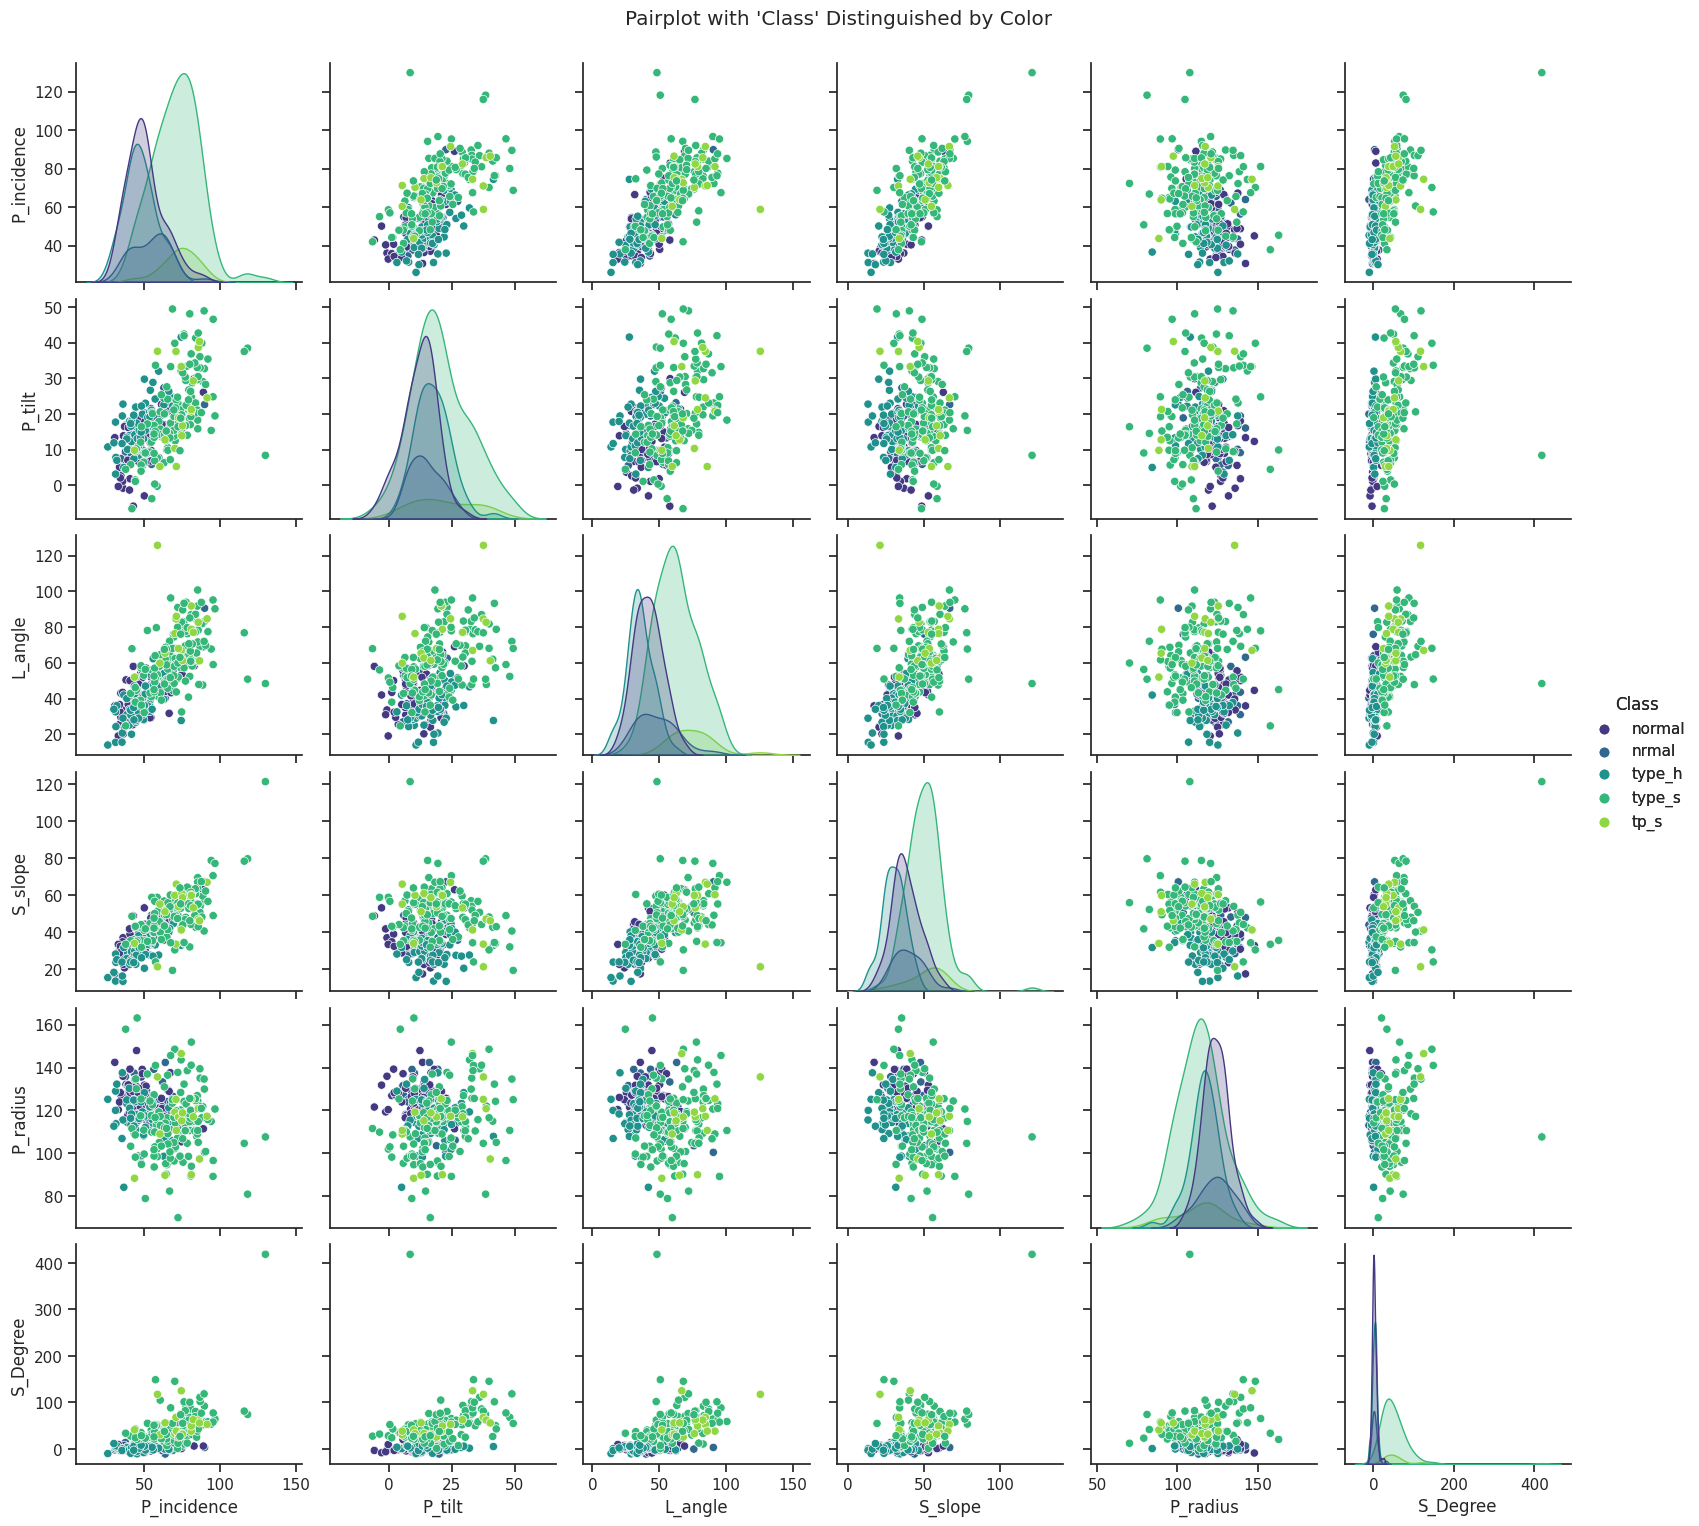

In [ ]:
# Setting the style of the pairplot
sns.set(style="ticks")

# Create a pairplot with 'Class' as hue (to distinguish classes by color)
pairplot = sns.pairplot(data=combined_df, hue='Class', palette='viridis')

# Add a legend/labelss
pairplot.add_legend()

# Set the title/heading.
plt.suptitle("Pairplot with 'Class' Distinguished by Color", y=1.02)

plt.show()


Part 1.3 d - Visualize a jointplot for ‘P_incidence’ and ‘S_slope’ and share insights



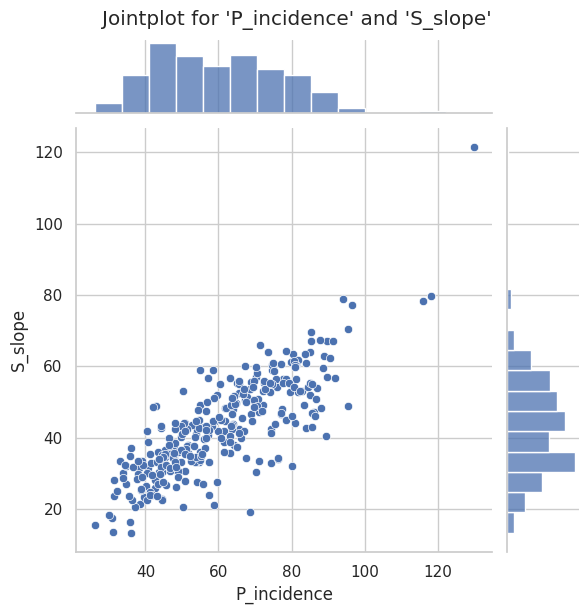

In [ ]:
# Create a jointplot for 'P_incidence' and 'S_slope'
sns.set(style="whitegrid")
jointplot = sns.jointplot(x="P_incidence", y="S_slope", data=combined_df, kind="scatter")

# Set the title
jointplot.fig.suptitle("Jointplot for 'P_incidence' and 'S_slope'", y=1.02)

# Show the jointplot
plt.show()

INSIGHTS:

Scatter Plot: The jointplot displays a scatter plot of the 'P_incidence' on the x-axis and 'S_slope' on the y-axis. Each point in the plot represents an observation from the dataset, with 'P_incidence' values on the horizontal axis and 'S_slope' values on the vertical axis.

Clearly there is a positive corelation bw S_slope and P_incidence.


Part 1.3 e - Visualize a boxplot to check distribution of the features and share insights.


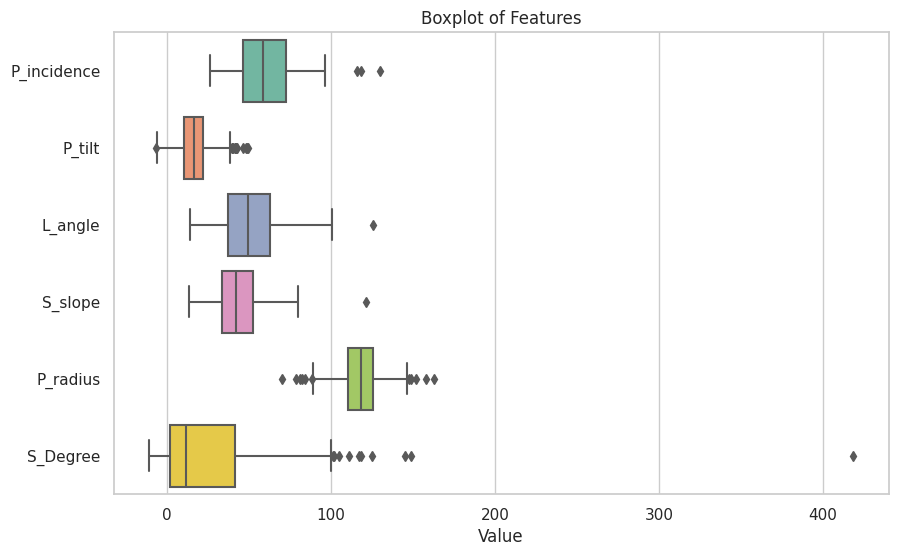

In [ ]:
# Create a boxplot for the features
plt.figure(figsize=(10, 6))
sns.boxplot(data=combined_df, orient="h", palette="Set2")
plt.title("Boxplot of Features")
plt.xlabel("Value")
plt.show()

INSIGHTS:

Box and Whiskers: In the boxplot, each box represents the interquartile range (IQR) of a feature's distribution, while the whiskers extend to the minimum and maximum values within a certain range from the quartiles. The line inside the box represents the median (50th percentile) of the distribution.ANd the points oytside the whiskers are called outliers, and it is upto the analyst to decide what is to be done with them. They can either be considered, or discared.

Part 1.4 a - Split data into X and Y.


In [ ]:
# Separate the target variable 'Class' (Y) from the features (X)
X = combined_df.drop(columns=['Class'])  # X contains all columns except 'Class'
Y = combined_df['Class']  # Y contains only the 'Class' column


Part 1.4 b - Split data into train and test with 80:20 proportion


In [ ]:
# Split the data into training (80%) and testing (20%) sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Print the shapes of the resulting sets to verify proportions
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)


X_train shape: (248, 6)
X_test shape: (62, 6)
Y_train shape: (248,)
Y_test shape: (62,)


Part 1.4 c - Train a Supervised Learning Classification base model using KNN classifier

In [ ]:
# Create a KNN classifier with a specified number of neighbors (e.g., 3)
knn_classifier = KNeighborsClassifier(n_neighbors=16)

# Train the KNN classifier on the training data
knn_classifier.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=16)

Part 1.4 d - Print all the possible performance metrics for both train and test data


In [4]:
# Predictions on the training data(Before Optimization.)
#The following pieces of code will illustrate the best values of various parameters such as k, distance metrics etc.

Y_train_pred = knn_classifier.predict(X_train)

# Predictions on the test data
Y_test_pred = knn_classifier.predict(X_test)

# Performance metrics for training data
print("Performance Metrics for Training Data:")
print("Accuracy:", accuracy_score(Y_train, Y_train_pred))
print("Precision:", precision_score(Y_train, Y_train_pred, average='weighted'))
print("Recall:", recall_score(Y_train, Y_train_pred, average='weighted'))
print("F1-Score:", f1_score(Y_train, Y_train_pred, average='weighted'))
print("Confusion Matrix:")
print(confusion_matrix(Y_train, Y_train_pred))

# Performance metrics for test data
print("\nPerformance Metrics for Test Data:")
print("Accuracy:", accuracy_score(Y_test, Y_test_pred))
print("Precision:", precision_score(Y_test, Y_test_pred, average='weighted'))
print("Recall:", recall_score(Y_test, Y_test_pred, average='weighted'))
print("F1-Score:", f1_score(Y_test, Y_test_pred, average='weighted'))
print("Confusion Matrix:")
print(confusion_matrix(Y_test, Y_test_pred))




NameError: ignored

Part 1.5 a - Experiment with various parameters to improve performance of the base model.


For KNN Classification, various parameters can be played around with:Like the value of K(Which in my opinion is a very important factor), along with factors like weights,distance metrics etc.


For my approach for finding out which are the best set of parameters, I will be using a for loop to iterate over a set values fork,weights etc and then find out which is the best set of parameters.


In [ ]:
#TEsting for the best value of K in the KNN classification.
best_k = None
best_accuracy = 0

for k in range(1, 21):  # Try values of k from 1 to 20
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train, Y_train)
    Y_test_pred = knn_classifier.predict(X_test)
    accuracy = accuracy_score(Y_test, Y_test_pred)

    if accuracy > best_accuracy:
        best_k = k
        best_accuracy = accuracy

print("Best k:", best_k)
print("Best Accuracy:", best_accuracy)

Best k: 16
Best Accuracy: 0.7258064516129032


In [ ]:
#Testing with Manhattan distance.
#But We can also test with Euclidean distances or Minkowski distances etc,by changing the valiue of p.
knn_classifier = KNeighborsClassifier(n_neighbors=best_k, p=1)
knn_classifier.fit(X_train, Y_train)
Y_test_pred = knn_classifier.predict(X_test)
accuracy = accuracy_score(Y_test, Y_test_pred)
print("Accuracy with Manhattan distance:", accuracy)

Accuracy with Manhattan distance: 0.6774193548387096


In [ ]:
# Trying with distance-based weights
#We can also experiment with distance based weights to give more importance to closer neighbours etc.
#The default is uniform weights.
knn_classifier = KNeighborsClassifier(n_neighbors=best_k, weights='distance')
knn_classifier.fit(X_train, Y_train)
Y_test_pred = knn_classifier.predict(X_test)
accuracy = accuracy_score(Y_test, Y_test_pred)
print("Accuracy with distance-based weights:", accuracy)


Accuracy with distance-based weights: 0.7419354838709677


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the KNN classifier on scaled data
knn_classifier = KNeighborsClassifier(n_neighbors=best_k)
knn_classifier.fit(X_train_scaled, Y_train)
Y_test_pred = knn_classifier.predict(X_test_scaled)
accuracy = accuracy_score(Y_test, Y_test_pred)
print("Accuracy with scaled data:", accuracy)

Accuracy with scaled data: 0.7258064516129032


Part 1.5 b - Clearly showcase improvement in performance achieved

As we can see, varying the value of k, we can see significant improvements in the accuracy and precision of the test data.

FOllowing are some statistics that reveal the same.
___________________________________________________________________________

for k=3
Performance Metrics for Training Data:

Accuracy: 0.8548387096774194

Precision: 0.8575726777548245

Recall: 0.8548387096774194

F1-Score: 0.8471453675877925



Performance Metrics for Test Data:

Accuracy: 0.6612903225806451

Precision: 0.614347158218126

Recall: 0.6612903225806451

F1-Score: 0.6339307369807006
_________________________________________________________________


for k=7

Performance Metrics for Training Data:


Accuracy: 0.8024193548387096

Precision: 0.8090391295938822

Recall: 0.8024193548387096

F1-Score: 0.7786381810726041


Performance Metrics for Test Data:

Accuracy: 0.6451612903225806

Precision: 0.5532701169797944

Recall: 0.6451612903225806

F1-Score: 0.5943969776227841
_____________________________________________________________________

for k=16(Most Optimised)

Performance Metrics for Training Data:


Accuracy: 0.7298387096774194

Precision: 0.6900484578381438

Recall: 0.7298387096774194

F1-Score: 0.6931684502217575


Performance Metrics for Test Data:

Accuracy: 0.7258064516129032

Precision: 0.597911821215492

Recall: 0.7258064516129032

F1-Score: 0.6551693386751208
___________________________________________________________________

This process can be repected by taking random values of the other parameters and clearly observing which parameter/combination of parameters have the most effect on the accuracy of the model.



Part 1.5 c - Clearly state which parameters contributed most to improve model performance.

In my opinion, the value of "k" had the most significant contribution in improving the model performance.As the accuracy of the test and training data were drastically improved upon the optimisation of k.

By optimizing k, we were able to prevent both overfitting and underfitting of the model, and hence, improved our overall accuracy of our model.

________________________________________________________________________________
                                END OF PART-A
________________________________________________________________________________                                

Part 2.1 a -
 Read both the Datasets ‘Data1’ and ‘Data 2’ as DataFrame and store them into

---

two separate variables


In [ ]:
path="/content/drive/MyDrive/AIMLCOURSE/SupervisedLearning/Data1.csv"
Data1=pd.read_csv(path)


In [ ]:
path="/content/drive/MyDrive/AIMLCOURSE/SupervisedLearning/Data2.csv"
Data2=pd.read_csv(path)

Part 2.1 b - Print shape and Column Names and DataTypes of both the Dataframes.




In [ ]:
# Print the shape of Data1 DataFrame
print("Shape of Data1:", Data1.shape)

# Print the column names of Data1 DataFrame
print("\nColumn Names of Data1:")
print(Data1.columns)

# Print the data types of columns in Data1 DataFrame
print("\nData Types of Columns in Data1:")
print(Data1.dtypes)

# Print a separator line
print("\n" + "-"*50 + "\n")

# Print the shape of Data2 DataFrame
print("Shape of Data2:", Data2.shape)

# Print the column names of Data2 DataFrame
print("\nColumn Names of Data2:")
print(Data2.columns)

# Print the data types of columns in Data2 DataFrame
print("\nData Types of Columns in Data2:")
print(Data2.dtypes)


Shape of Data1: (5000, 8)

Column Names of Data1:
Index(['ID', 'Age', 'CustomerSince', 'HighestSpend', 'ZipCode', 'HiddenScore',
       'MonthlyAverageSpend', 'Level'],
      dtype='object')

Data Types of Columns in Data1:
ID                       int64
Age                      int64
CustomerSince            int64
HighestSpend             int64
ZipCode                  int64
HiddenScore              int64
MonthlyAverageSpend    float64
Level                    int64
dtype: object

--------------------------------------------------

Shape of Data2: (5000, 7)

Column Names of Data2:
Index(['ID', 'Mortgage', 'Security', 'FixedDepositAccount', 'InternetBanking',
       'CreditCard', 'LoanOnCard'],
      dtype='object')

Data Types of Columns in Data2:
ID                       int64
Mortgage                 int64
Security                 int64
FixedDepositAccount      int64
InternetBanking          int64
CreditCard               int64
LoanOnCard             float64
dtype: object


Part 2.1 c - Merge both the Dataframes on ‘ID’ feature to form a single DataFrame


In [ ]:
# Merge Data1 and Data2 on the 'ID' feature
merged_df = Data1.merge(Data2, on='ID', how='inner')

# Print the shape of the merged DataFrame
print("Shape of Merged DataFrame:", merged_df.shape)

print("\nFirst Few Rows of Merged DataFrame:")
print(merged_df.head())

Shape of Merged DataFrame: (5000, 14)

First Few Rows of Merged DataFrame:
   ID  Age  CustomerSince  HighestSpend  ZipCode  HiddenScore  \
0   1   25              1            49    91107            4   
1   2   45             19            34    90089            3   
2   3   39             15            11    94720            1   
3   4   35              9           100    94112            1   
4   5   35              8            45    91330            4   

   MonthlyAverageSpend  Level  Mortgage  Security  FixedDepositAccount  \
0                  1.6      1         0         1                    0   
1                  1.5      1         0         1                    0   
2                  1.0      1         0         0                    0   
3                  2.7      2         0         0                    0   
4                  1.0      2         0         0                    0   

   InternetBanking  CreditCard  LoanOnCard  
0                0           0         NaN  

Part 2.1 d - Change Datatype of below features to ‘Object’


In [ ]:
# Assuming df is your DataFrame
features_to_convert = ['CreditCard', 'InternetBanking', 'FixedDepositAccount', 'Security', 'Level', 'HiddenScore']

# Convert the specified features to 'Object' type
merged_df[features_to_convert] = merged_df[features_to_convert].astype('object')



Part 2.2 a - Visualize distribution of Target variable ‘LoanOnCard’ and clearly share insights

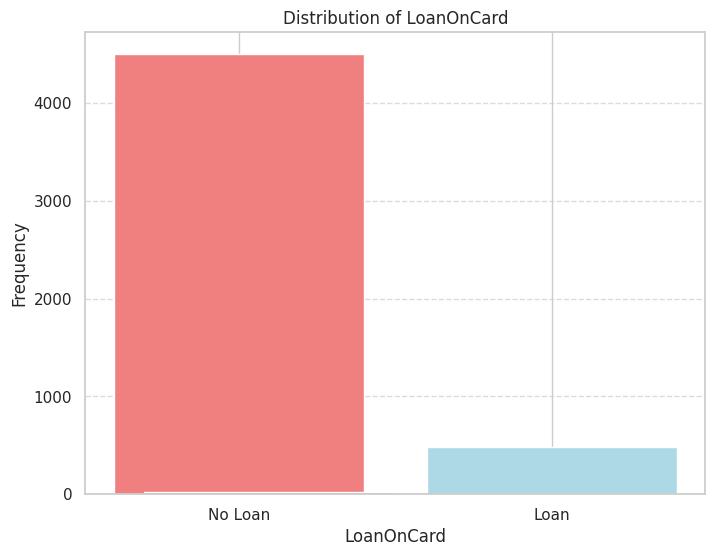

'This is a bargraph, where on the x axos(LOan on x axis) the value  has a value of 4500 on y axis and the x value 1 has a value of about 500 on y.\nThere is a clear inbalance in favour of not having a loan on the card,with a majority of people having no loan. '

In [ ]:
loan_counts = merged_df['LoanOnCard'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(loan_counts.index, loan_counts.values, color=['lightcoral', 'lightblue'])
plt.xlabel('LoanOnCard')
plt.ylabel('Frequency')
plt.xticks([0, 1], ['No Loan', 'Loan'])
plt.title('Distribution of LoanOnCard')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()



"""This is a bargraph, where on the x axos(LOan on x axis) the value  has a value of 4500 on y axis and the x value 1 has a value of about 500 on y.
There is a clear inbalance in favour of not having a loan on the card,with a majority of people having no loan. """

Part 2.2 b - Check the percentage of missing values and impute if required.

In [ ]:
# Calculate the percentage of missing values for each column
missing_percentage = (merged_df.isnull().sum() / len(merged_df)) * 100

# Create a DataFrame to display missing values and their percentages
missing_data = pd.DataFrame({'Missing Values': merged_df.isnull().sum(), 'Percentage': missing_percentage})

# Print columns with missing values and their respective percentages
print("Columns with Missing Values:")
print(missing_data[missing_data['Missing Values'] > 0])

# Decide on imputation strategies based on column types
numerical_columns_to_impute = ['MonthlyAverageSpend', 'LoanOnCard']  # Numerical columns
categorical_columns_to_impute = ['HiddenScore', 'Level', 'Security', 'FixedDepositAccount', 'InternetBanking', 'CreditCard']  # Categorical columns

# Impute missing values in numerical columns with the mean
for col in numerical_columns_to_impute:
    merged_df[col].fillna(merged_df[col].mean(), inplace=True)

# Impute missing values in categorical columns with a specific value (e.g., 'Unknown')
for col in categorical_columns_to_impute:
    merged_df[col].fillna('Unknown', inplace=True)

# Verify that missing values have been imputed
print("\nAfter Imputation:")
print(merged_df.isnull().sum())




Columns with Missing Values:
            Missing Values  Percentage
LoanOnCard              20         0.4

After Imputation:
ID                     0
Age                    0
CustomerSince          0
HighestSpend           0
ZipCode                0
HiddenScore            0
MonthlyAverageSpend    0
Level                  0
Mortgage               0
Security               0
FixedDepositAccount    0
InternetBanking        0
CreditCard             0
LoanOnCard             0
dtype: int64


Part 2.2 c - Check for unexpected values in each categorical variable and impute with best suitable value.

In [ ]:
# Check for unexpected values in 'CreditCard'
unexpected_values = merged_df['CreditCard'].unique()
print("Unexpected values in 'CreditCard':", unexpected_values)


# Replace unexpected values in 'CreditCard' with the mode
merged_df['CreditCard'] = merged_df['CreditCard'].replace(['?', 'a', 1.5], merged_df['CreditCard'].mode().iloc[0])


# List of categorical columns in your DataFrame
categorical_columns = ['CreditCard', 'InternetBanking', 'FixedDepositAccount', 'Security', 'Level', 'HiddenScore']

for column in categorical_columns:
    unexpected_values = merged_df[column].unique()
    print(f"Unexpected values in '{column}': {unexpected_values}")

    # Replace unexpected values with the mode
    merged_df[column] = merged_df[column].replace(['?', 'a', 1.5], merged_df[column].mode().iloc[0])




Unexpected values in 'CreditCard': [0 1]
Unexpected values in 'CreditCard': [0 1]
Unexpected values in 'InternetBanking': [0 1]
Unexpected values in 'FixedDepositAccount': [0 1]
Unexpected values in 'Security': [1 0]
Unexpected values in 'Level': [1 2 3]
Unexpected values in 'HiddenScore': [4 3 1 2]


Part 2.3 a- Split data into X and Y


In [ ]:

# Drop 'ID' and 'ZipCode' columns and assign the result to 'X'
X = merged_df.drop(['ID', 'ZipCode', 'LoanOnCard'], axis=1)

# 'Y' contains the target variable 'LoanOnCard'
Y = merged_df['LoanOnCard']



Part 2.3 b - Split data into train and test. Keep 25% data reserved for testing


In [ ]:
# Split the data into 75% training and 25% testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)




Part 2.3 c - Train a Supervised Learning Classification base model - Logistic Regression


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

# Assuming 'merged_df' is your DataFrame
# Drop 'ID' and 'ZipCode' columns and assign the result to 'X'
X = merged_df.drop(['ID', 'ZipCode', 'LoanOnCard'], axis=1)

# 'Y' contains the target variable 'LoanOnCard'
Y = merged_df['LoanOnCard']

# Split the data into 75% training and 25% testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Fit the label encoder to your continuous target variable and transform it
Y_train_encoded = label_encoder.fit_transform(Y_train)
Y_test_encoded = label_encoder.transform(Y_test)

# Create a Logistic Regression classifier
logistic_regression_model = LogisticRegression(max_iter=100000,random_state=42)

# Train the model on the training data
logistic_regression_model.fit(X_train, Y_train_encoded)

# Optionally, you can make predictions on the test data
Y_pred = logistic_regression_model.predict(X_test)




Part 2.3 d - Print evaluation metrics for the model and clearly share insights.

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(Y_test_encoded, Y_pred)

# Calculate precision, recall, and F1 score for multiclass
precision = precision_score(Y_test_encoded, Y_pred, average='weighted')
recall = recall_score(Y_test_encoded, Y_pred, average='weighted')
f1 = f1_score(Y_test_encoded, Y_pred, average='weighted')

# Print the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Generate a classification report for more detailed metrics
classification_rep = classification_report(Y_test_encoded, Y_pred)
print("\nClassification Report:\n", classification_rep)


Accuracy: 0.9456
Precision: 0.9390814707580417
Recall: 0.9456
F1 Score: 0.940518621728488

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97      1111
           1       0.00      0.00      0.00         5
           2       0.85      0.64      0.73       134

    accuracy                           0.95      1250
   macro avg       0.60      0.54      0.57      1250
weighted avg       0.94      0.95      0.94      1250



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:13

Part 2.3 e - Balance the data using the right balancing technique.


In [ ]:


# Create a RandomOverSampler instance
oversampler = RandomOverSampler(random_state=42)

# Resample the training data to balance the classes
X_train_resampled, Y_train_resampled = oversampler.fit_resample(X_train, Y_train_encoded)

# Now, X_train_resampled and Y_train_resampled have balanced classes


Part 2.3 f- Again train the same previous model on balanced data


In [ ]:
# Create a Logistic Regression classifier
logistic_regression_model_balanced = LogisticRegression(max_iter=100000,random_state=42)

# Train the model on the balanced training data
logistic_regression_model_balanced.fit(X_train_resampled, Y_train_resampled)

# Make predictions on the test data
Y_pred_balanced = logistic_regression_model_balanced.predict(X_test)


Part 2.3 g- Print evaluation metrics and clearly share differences observed


In [ ]:
# Calculate accuracy
accuracy_balanced = accuracy_score(Y_test_encoded, Y_pred_balanced)

# Calculate precision, recall, and F1 score for multiclass
precision_balanced = precision_score(Y_test_encoded, Y_pred_balanced, average='weighted')
recall_balanced = recall_score(Y_test_encoded, Y_pred_balanced, average='weighted')
f1_balanced = f1_score(Y_test_encoded, Y_pred_balanced, average='weighted')

# Print the metrics for the balanced model
print("Balanced Model Metrics:")
print("Accuracy:", accuracy_balanced)
print("Precision:", precision_balanced)
print("Recall:", recall_balanced)
print("F1 Score:", f1_balanced)

# Generate a classification report for more detailed metrics
classification_rep_balanced = classification_report(Y_test_encoded, Y_pred_balanced)
print("\nClassification Report for Balanced Model:\n", classification_rep_balanced)


Balanced Model Metrics:
Accuracy: 0.6
Precision: 0.9269877187906306
Recall: 0.6
F1 Score: 0.7087236775720173

Classification Report for Balanced Model:
               precision    recall  f1-score   support

           0       0.98      0.57      0.72      1111
           1       0.00      0.20      0.01         5
           2       0.52      0.90      0.66       134

    accuracy                           0.60      1250
   macro avg       0.50      0.55      0.46      1250
weighted avg       0.93      0.60      0.71      1250



In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Create an SVM classifier
svm_model = SVC(random_state=42)

# Train the SVM model on the balanced training data
svm_model.fit(X_train_resampled, Y_train_resampled)

# Make predictions on the test data
Y_pred_svm = svm_model.predict(X_test)

# Calculate accuracy for the SVM model
accuracy_svm = accuracy_score(Y_test_encoded, Y_pred_svm)

# Print the accuracy for the SVM model
print("SVM Model Accuracy:", accuracy_svm)




from sklearn.neighbors import KNeighborsClassifier

# Create a KNN classifier
knn_model = KNeighborsClassifier()

# Train the KNN model on the balanced training data
knn_model.fit(X_train_resampled, Y_train_resampled)

# Make predictions on the test data
Y_pred_knn = knn_model.predict(X_test)

# Calculate accuracy for the KNN model
accuracy_knn = accuracy_score(Y_test_encoded, Y_pred_knn)

# Print the accuracy for the KNN model
print("KNN Model Accuracy:", accuracy_knn)


SVM Model Accuracy: 0.4896
KNN Model Accuracy: 0.8544


Part 2.4 b - Tune parameters for each of the models wherever required and finalize a model

In [ ]:
#For SVC Model

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Define a grid of hyperparameters to search
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto', 0.1, 1]
}

# Use grid search to find the best hyperparameters
grid_search_svm = GridSearchCV(SVC(random_state=42), param_grid_svm, cv=5, scoring='accuracy')
grid_search_svm.fit(X_train_resampled, Y_train_resampled)

# Print the best hyperparameters and the corresponding accuracy
best_params_svm = grid_search_svm.best_params_
best_accuracy_svm = grid_search_svm.best_score_

print("Best Hyperparameters for SVM:", best_params_svm)
print("Best Accuracy for SVM:", best_accuracy_svm)

# Create the final SVM model using the best hyperparameters
final_svm_model = SVC(**best_params_svm, random_state=42)
final_svm_model.fit(X_train_resampled, Y_train_resampled)

# Make predictions on the test data
Y_pred_svm = final_svm_model.predict(X_test)

# Calculate accuracy for the final SVM model
accuracy_svm = accuracy_score(Y_test_encoded, Y_pred_svm)
print("Final SVM Model Accuracy:", accuracy_svm)


In [ ]:
#For KNN classification

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Define a grid of hyperparameters to search
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
}

# Use grid search to find the best number of neighbors
grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring='accuracy')
grid_search_knn.fit(X_train_resampled, Y_train_resampled)

# Print the best hyperparameters and the corresponding accuracy
best_params_knn = grid_search_knn.best_params_
best_accuracy_knn = grid_search_knn.best_score_

print("Best Hyperparameters for KNN:", best_params_knn)
print("Best Accuracy for KNN:", best_accuracy_knn)

# Create the final KNN model using the best number of neighbors
final_knn_model = KNeighborsClassifier(**best_params_knn)
final_knn_model.fit(X_train_resampled, Y_train_resampled)

# Make predictions on the test data
Y_pred_knn = final_knn_model.predict(X_test)

# Calculate accuracy for the final KNN model
accuracy_knn = accuracy_score(Y_test_encoded, Y_pred_knn)
print("Final KNN Model Accuracy:", accuracy_knn)


"""Since, KNN seems to show a higher degree of accuracy, I would like to go with KNN".


Best Hyperparameters for KNN: {'n_neighbors': 3}
Best Accuracy for KNN: 0.9650834485657256
Final KNN Model Accuracy: 0.8688


Part 2.4 c- Print evaluation metrics for final mode


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Make predictions on the test data using the final KNN model
Y_pred_knn = final_knn_model.predict(X_test)

# Calculate and print various evaluation metrics
accuracy_knn = accuracy_score(Y_test_encoded, Y_pred_knn)
precision_knn = precision_score(Y_test_encoded, Y_pred_knn, average='weighted')
recall_knn = recall_score(Y_test_encoded, Y_pred_knn, average='weighted')
f1_score_knn = f1_score(Y_test_encoded, Y_pred_knn, average='weighted')

print("Evaluation Metrics for Final KNN Model:")
print("Accuracy:", accuracy_knn)
print("Precision:", precision_knn)
print("Recall:", recall_knn)
print("F1 Score:", f1_score_knn)

# Generate a classification report for more detailed metrics
classification_rep_knn = classification_report(Y_test_encoded, Y_pred_knn)
print("\nClassification Report for Final KNN Model:\n", classification_rep_knn)


Evaluation Metrics for Final KNN Model:
Accuracy: 0.8688
Precision: 0.894698915725792
Recall: 0.8688
F1 Score: 0.8794878746747127

Classification Report for Final KNN Model:
               precision    recall  f1-score   support

           0       0.95      0.90      0.92      1111
           1       0.00      0.00      0.00         5
           2       0.47      0.65      0.54       134

    accuracy                           0.87      1250
   macro avg       0.47      0.52      0.49      1250
weighted avg       0.89      0.87      0.88      1250



Part 2.4 d- Share improvement achieved from base model to final model


In [ ]:
# Create a base KNN classifier
base_knn_model = KNeighborsClassifier()

# Train the base KNN model on the balanced training data
base_knn_model.fit(X_train_resampled, Y_train_resampled)

# Make predictions on the test data using the base KNN model
Y_pred_base_knn = base_knn_model.predict(X_test)

# Calculate evaluation metrics for the base KNN model
accuracy_base_knn = accuracy_score(Y_test_encoded, Y_pred_base_knn)
precision_base_knn = precision_score(Y_test_encoded, Y_pred_base_knn, average='weighted')
recall_base_knn = recall_score(Y_test_encoded, Y_pred_base_knn, average='weighted')
f1_score_base_knn = f1_score(Y_test_encoded, Y_pred_base_knn, average='weighted')

# Create the final KNN model as previously done

# Make predictions on the test data using the final KNN model
Y_pred_final_knn = final_knn_model.predict(X_test)

# Calculate evaluation metrics for the final KNN model
accuracy_final_knn = accuracy_score(Y_test_encoded, Y_pred_final_knn)
precision_final_knn = precision_score(Y_test_encoded, Y_pred_final_knn, average='weighted')
recall_final_knn = recall_score(Y_test_encoded, Y_pred_final_knn, average='weighted')
f1_score_final_knn = f1_score(Y_test_encoded, Y_pred_final_knn, average='weighted')

# Compare the metrics between the base and final KNN models
improvement_accuracy = accuracy_final_knn - accuracy_base_knn
improvement_precision = precision_final_knn - precision_base_knn
improvement_recall = recall_final_knn - recall_base_knn
improvement_f1_score = f1_score_final_knn - f1_score_base_knn

# Share the improvements
print("Improvement Achieved from Base KNN Model to Final KNN Model:")
print("Accuracy Improvement:", improvement_accuracy)
print("Precision Improvement:", improvement_precision)
print("Recall Improvement:", improvement_recall)
print("F1 Score Improvement:", improvement_f1_score)


Improvement Achieved from Base KNN Model to Final KNN Model:
Accuracy Improvement: 0.014399999999999968
Precision Improvement: -0.00537929423491057
Recall Improvement: 0.014399999999999968
F1 Score Improvement: 0.007898375686054782
